In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploración de datos

### Tamaño de cada archivo
A través de la consola de comandos se verifica el número de líneas que tiene cada archivo

* train_ver2.csv
* test_ver2.csv

In [2]:
!wc data/train_ver2.csv data/train_ver2.csv

  13647310  160755658 2292759599 data/train_ver2.csv
  13647310  160755658 2292759599 data/train_ver2.csv
  27294620  321511316 4585519198 total


## Datos de entrenamiento *train_ver2.csv*

In [2]:
df = pd.read_csv('data/train_ver2.csv', dtype={'sexo': str,
                                                'age': str,
                                                    'ind_nuevo': str,
                                                'indrel_1mes': str,
                                                'antiguedad': str,
                                                'ult_fec_cli_lt': str,
                                                'indext': str,
                                                'conyuemp': str}, parse_dates=['fecha_dato', 'fecha_alta'])
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
df.shape

(13647309, 48)

Descripción breve de los atributos numéricos

In [350]:
df.iloc[:,:24].describe()

,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


# Descripción del dataset

En esta sección se revisarán los 24 atributos del dataset, tanto los númericos como los atributos categóricos. Además se hará una revisión de los *targets* que se proveen



### Columnas con datos faltantes

In [3]:
missing = list(df.isnull().any())

In [4]:
missing_cols = [col for i, col in enumerate(df.columns) if missing[i]]
missing_vals = [val for val in sum(df.isnull().values * 1) if val > 0]

In [5]:
print("Cantidad de columnas con datos faltantes", len(missing_cols))

Cantidad de columnas con datos faltantes 22


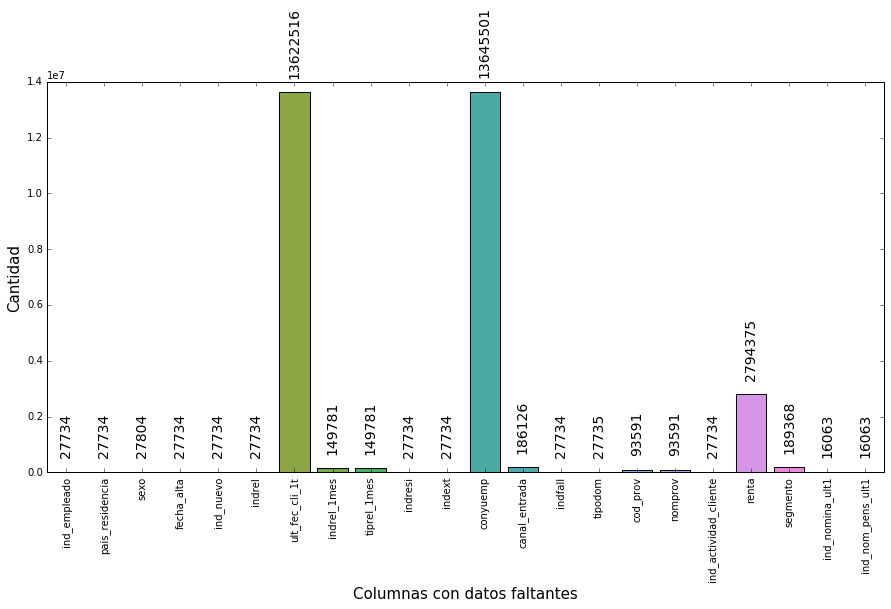

In [242]:
plt.figure(figsize=(15, 7))
graph = sns.barplot(missing_cols, missing_vals)
plt.xticks(rotation='vertical')
plt.ylabel('Cantidad', size=15)
plt.xlabel('Columnas con datos faltantes', size=15)
for i in range(len(missing_cols)):
    graph.text(i, missing_vals[i] + 500000, missing_vals[i], ha='center', va='bottom', rotation='vertical', size=14)

### Cantidad de registros por mes
En la siguiente gráfica se muestran los registros tomados cada mes, desde el mes de enero de 2015 hasta el mes de mayo del 2016

In [4]:
dates_str = df.fecha_dato.value_counts().index
count_dates = df.fecha_dato.value_counts().values

In [11]:
dates_str = [str(date).split()[0] for date in dates_str]
dates_str

['2016-05-28',
 '2016-04-28',
 '2016-03-28',
 '2016-02-28',
 '2016-01-28',
 '2015-12-28',
 '2015-11-28',
 '2015-10-28',
 '2015-09-28',
 '2015-08-28',
 '2015-07-28',
 '2015-06-28',
 '2015-05-28',
 '2015-04-28',
 '2015-03-28',
 '2015-02-28',
 '2015-01-28']

In [13]:
count_dates

array([931453, 928274, 925076, 920904, 916269, 912021, 906109, 892251,
       865440, 843201, 829817, 632110, 631957, 630367, 629209, 627394,
       625457])

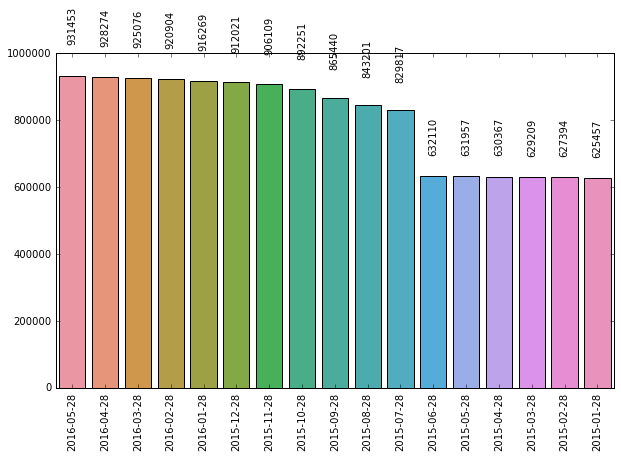

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(dates_str, count_dates)
plt.xticks(rotation='vertical')
for i, count in enumerate(count_dates):
    plt.text(i, count*1.1, count, ha='center', va='bottom', rotation='vertical')

### Clientes
Cantidad de clientes 

In [24]:
cant_customers = len(df.ncodpers.unique())
print("Cantidad de clientes", cant_customers)
print("Concurrencia promedio de cada cliente", df.shape[0]/cant_customers)

Cantidad de clientes 956645
Concurrencia promedio de cada cliente 14.265802884037443


### Índice del empleado
Hay tres índices de empleado.

* A: Activo
* B: Ex-empleado
* F: Filial
* N: No es empleado
* P: Pasivo

In [215]:
ind_empleado = df.ind_empleado.fillna(-1)

In [216]:
ind_empleado_vals = ind_empleado.value_counts().values
ind_empleado_cols = ind_empleado.value_counts().index

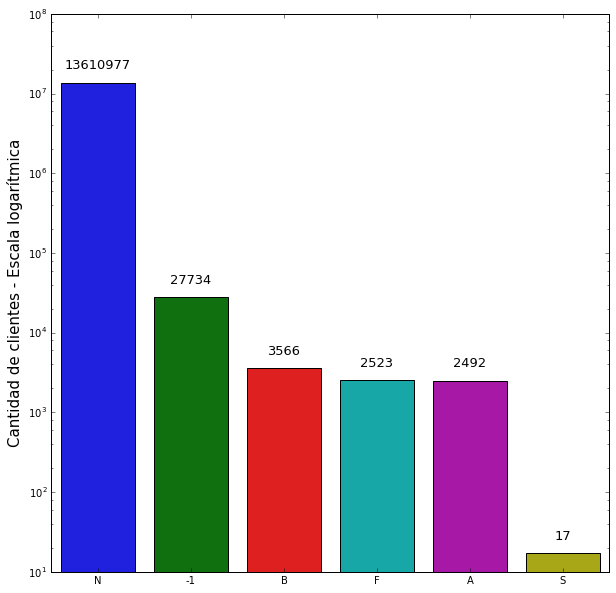

In [228]:
plt.figure(figsize=(10, 10))
graph = sns.barplot(ind_empleado_cols, ind_empleado_vals)
plt.yscale('log')
plt.ylabel('Cantidad de clientes - Escala logarítmica', size=15)
for i, val in enumerate(ind_empleado_vals):
    graph.text(i, val*1.5, val, ha='center', size=13)

### Género clientes
El sexo de los clientes está clasificado en Hembra y Varón

In [247]:
sex = df.sexo.fillna(-1)
sex_cols = sex.value_counts().index
sex_vals = sex.value_counts().values

array([7424252, 6195253,   27804])

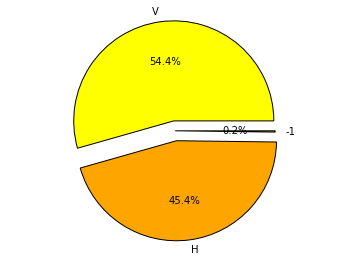

In [271]:
plt.pie(sex_vals, labels=sex_cols, explode=[0.1, 0.1, 0], autopct='%1.1f%%', colors=['yellow', 'orange'])
plt.axis('equal')
sex_vals

### Edad
Se mostrará la distribución de la edad de los clientes

Cantidad de edades (120,)
Edad mínima 2.0
Mayor edad 164.0


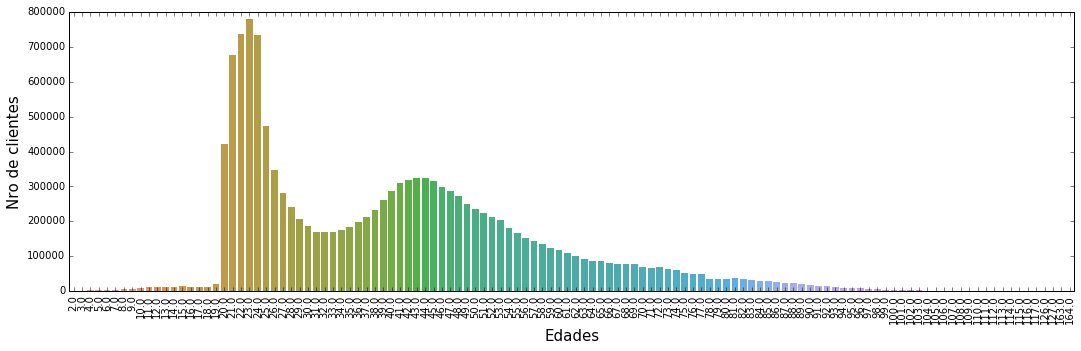

In [289]:
plt.figure(figsize=(18, 5))
age_counts = pd.to_numeric(df.age, errors="coerce").value_counts()
print('Cantidad de edades', age_counts.shape)
print('Edad mínima', min(age_counts.index))
print('Mayor edad', max(age_counts.index))
graph = sns.barplot(age_counts.index, age_counts.values)
plt.setp(graph.patches, linewidth=0)
plt.xticks(rotation='vertical', fontsize=10)
plt.xlabel('Edades', fontsize=15)
plt.ylabel('Nro de clientes', fontsize=15)

### Fecha de altas
Se indican las fechas donde hubo altas, es decir, la fecha cuando el cliente tuvo su primer contacto con el banco. Las altas van desde 1995 hasta 2015

In [304]:
print('Cantidad de datos faltantes', missing_vals[3])

Cantidad de datos faltantes 27734


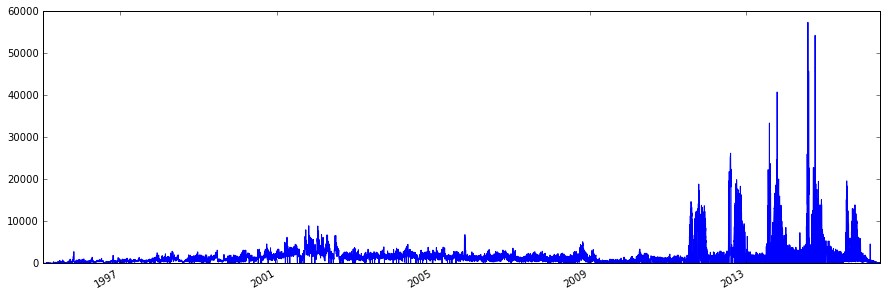

In [3]:
plt.figure(figsize=(15, 5))
df.fecha_alta.dropna().value_counts().plot()

In [12]:
print('Fecha con más clientes a la alta', df.fecha_alta.dropna().value_counts().index[0], df.fecha_alta.dropna().value_counts().values[0])
print('Fecha con menos clientes a la alta', df.fecha_alta.dropna().value_counts().index[-1], df.fecha_alta.dropna().value_counts().values[-1])

Fecha con más clientes a la alta 2014-07-28 00:00:00 57389
Fecha con menos clientes a la alta 2009-12-25 00:00:00 4


### Clientes nuevos

*  '1' si el cliente está registrado en los últimos 6 meses

In [29]:
ind_nuevo = df.ind_nuevo.fillna('-1')
ind_nuevo_cols = ind_nuevo.value_counts().index
ind_nuevo_values = ind_nuevo.value_counts().values

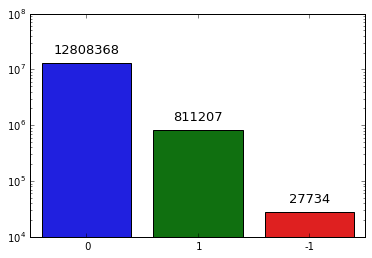

In [30]:
graph = sns.barplot(ind_nuevo_cols, ind_nuevo_values)
plt.yscale('log')
for i, val in enumerate(ind_nuevo_values):
    graph.text(i, val*1.5, val, ha='center', size=13)

### Antigüedad de los clientes (en meses)

In [13]:
antiguedad = df.antiguedad.replace(to_replace='     NA', value=np.nan).astype('float64')

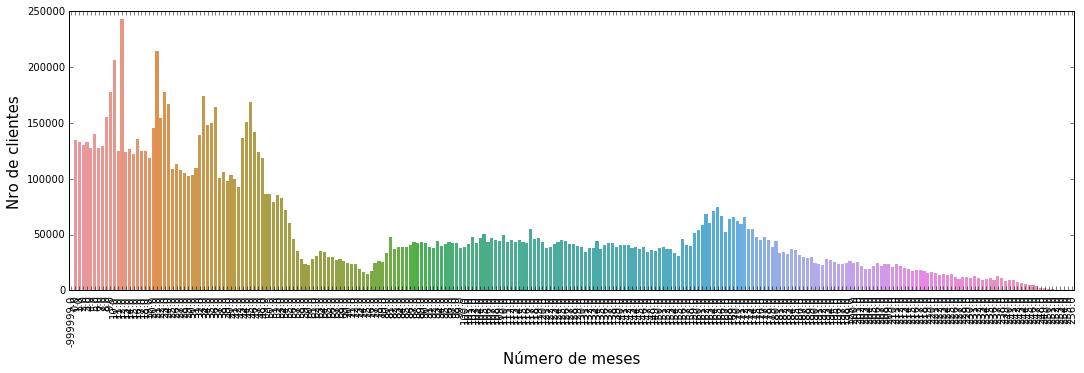

In [18]:
plt.figure(figsize=(18, 5))
age_counts = pd.to_numeric(df.age, errors="coerce").value_counts()
graph = sns.barplot(antiguedad.value_counts().index, antiguedad.value_counts().values)
plt.setp(graph.patches, linewidth=0)
plt.xticks(rotation='vertical', fontsize=10)
plt.xlabel('Número de meses', fontsize=15)
plt.ylabel('Nro de clientes', fontsize=15)

### Indíce relación del cliente (indrel)

In [57]:
indrel = df.indrel.fillna(-1)
indrel_cols = indrel.value_counts()
indrel_values = indrel.value_counts().values

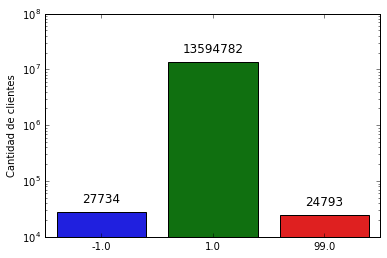

In [111]:
graph = sns.barplot(indrel_cols.index, indrel_cols.values)
plt.yscale('log')
plt.ylabel('Cantidad de clientes')
for i, col in enumerate(indrel_cols.index):
    graph.text([1, 0, 2][i], indrel_cols[col]*1.5, indrel_cols[col], size=12, ha='center')

### Tipo de cliente al principio del mes

* 1: First/Primary customer
* 2: Co-owner
* 3: Former primary
* 4: Former co-owner
* P: Potential

In [144]:
df.indrel_1mes.unique()

array(['1.0', '1', nan, '3.0', '3', '2', '2.0', '4.0', 'P', '4'], dtype=object)

In [146]:
map_indrel = {
    1.0  : "1",
    "1.0" : "1",
    "1"   : "1",
    "3.0" : "3",
    "P"   : "P",
    3.0   : "3",
    2.0   : "2",
    "3"   : "3",
    "2.0" : "2",
    "4.0" : "4",
    "4"   : "4",
    "2"   : "2",
    -1    : "-1"
}
indrel_1mes = df.indrel_1mes.fillna(-1).apply(lambda x: map_indrel.get(x, x)).value_counts()

In [148]:
indrel_1mes.values

array([13490681,   149781,     4350,     1317,      874,      306])

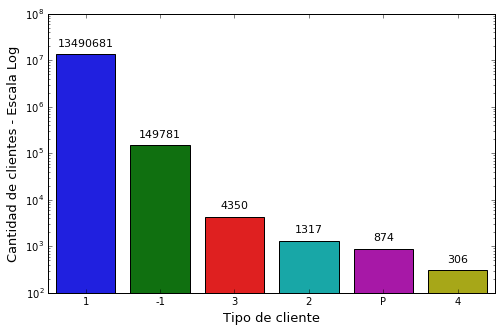

In [154]:
plt.figure(figsize=(8, 5))
graph = sns.barplot(indrel_1mes.index, indrel_1mes.values)
plt.yscale('log')
plt.ylabel('Cantidad de clientes - Escala Log', size=13)
plt.xlabel('Tipo de cliente', size=13)
for i, val in enumerate(indrel_1mes.values):
    graph.text(i, val*1.5, val, size=11, ha='center')

### Tipo de relación con el cliente al principio del mes

* A: Active
* I: Inactive
* P: Former customer
* R: Potential
* -1: NaN

In [156]:
tiprel = df.tiprel_1mes.fillna('-1').value_counts()

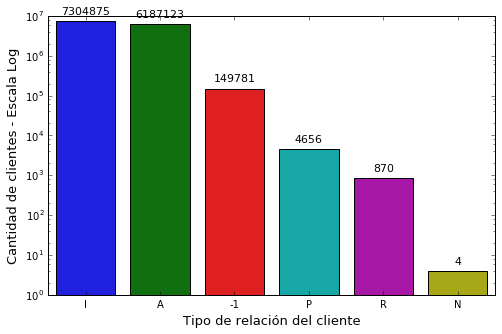

In [163]:
plt.figure(figsize=(8, 5))
graph = sns.barplot(tiprel.index, tiprel.values)
plt.yscale('log')
plt.ylabel('Cantidad de clientes - Escala Log', size=13)
plt.xlabel('Tipo de relación del cliente', size=13)
for i, val in enumerate(tiprel.values):
    graph.text(i, val*1.5, val, size=11, ha='center')

In [190]:
df.iloc[np.unique(np.array(df.fecha_dato), return_index=True)[1][-1]:].tiprel_1mes.value_counts()

I    534429
A    392607
P       330
R        77
Name: tiprel_1mes, dtype: int64

### Residencias en el mismo país del banco

In [192]:
indresi = df.indresi.fillna('-1').value_counts()

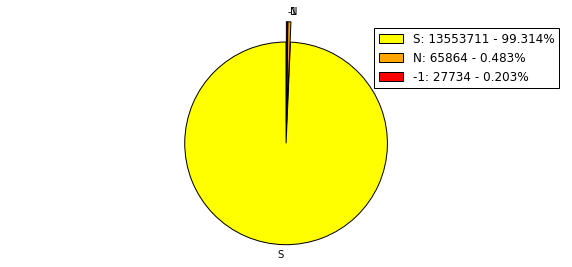

In [265]:
plt.figure(figsize=(10, 4))
plt.pie(indresi.values, labels=indresi.index, colors=['yellow', 'orange', 'red'], startangle=90, explode=[0.1, 0.1, 0.1])
plt.legend(loc='best', labels=['%s: %d - %1.3f%%' % (lab, indresi.values[i], (indresi.values[i]/sum(indresi.values))*100) for i, lab in enumerate(indresi.index)])
plt.axis('equal');

### Origen del cliente el mismo del país del banco

In [212]:
indext = df.indext.fillna('-1').value_counts()

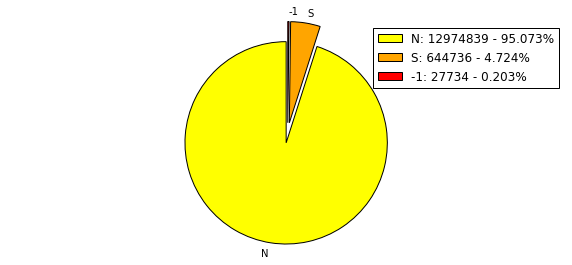

In [264]:
plt.figure(figsize=(10, 4))
plt.pie(indext.values, labels=indext.index, colors=['yellow', 'orange', 'red'], startangle=90, explode=[0.1, 0.1, 0.1])
plt.legend(loc='best', labels=['%s: %d - %1.3f%%' % (lab, indext.values[i], (indext.values[i]/sum(indext.values))*100) for i, lab in enumerate(indext.index)])
plt.axis('equal');

### Canal de entrada
Canal usado por el cliente para unirse al banco. No hay descripción de cada canal

In [234]:
canal_entrada = df.canal_entrada.fillna('-1').value_counts()

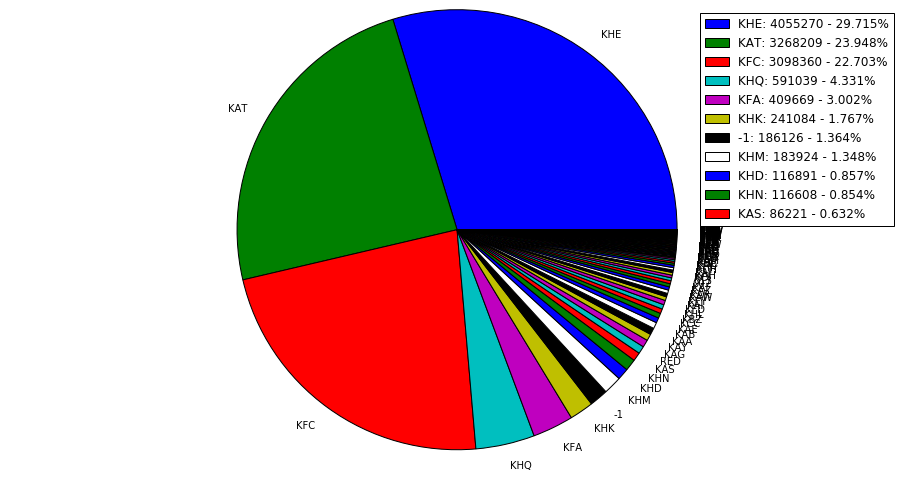

In [263]:
plt.figure(figsize=(16, 8))
plt.pie(canal_entrada.values, labels=canal_entrada.index)
plt.legend(loc='best', labels=['%s: %d - %1.3f%%' % (canal_entrada.index[i], canal_entrada.values[i], (canal_entrada.values[i]/sum(canal_entrada.values))*100) for i in range(11)])
#plt.legend(loc='best', labels=['%s: %d - %1.3f%%' % (lab, canal_entrada.values[i], canal_entrada.values[i]/sum(canal_entrada.values)) for i, lab in enumerate(canal_entrada.index)])
plt.axis('equal');

### Índice de fallecimiento

In [247]:
indfall = df.indfall.fillna('-1').value_counts()

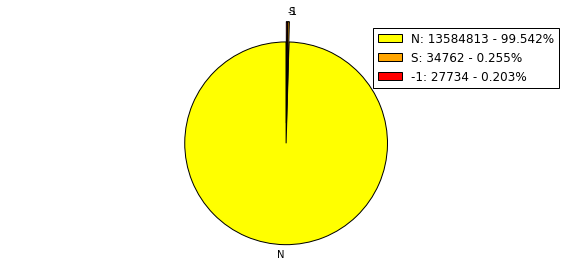

In [262]:
plt.figure(figsize=(10, 4))
plt.pie(indfall.values, labels=indfall.index, colors=['yellow', 'orange', 'red'], startangle=90, explode=[0.1, 0.1, 0.1])
plt.legend(loc='best', labels=['%s: %d - %1.3f%%' % (lab, indfall.values[i], (indfall.values[i]/sum(indfall.values))*100) for i, lab in enumerate(indfall.index)])
plt.axis('equal');

### Tipo domicilio

* 1: Dirección principal

In [253]:
df.tipodom.fillna('-1').value_counts()

1.0    13619574
-1        27735
Name: tipodom, dtype: int64

### Actividad del cliente

* 1: Cliente activo
* 2: Cliente inactivo

In [259]:
actividad_cliente = df.ind_actividad_cliente.fillna('-1').value_counts()

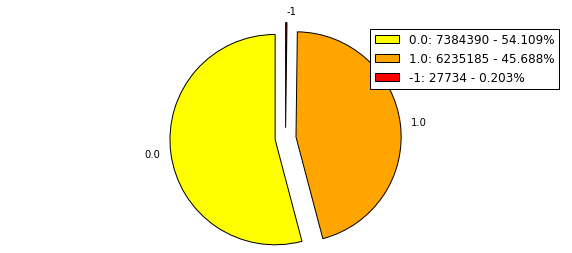

In [261]:
plt.figure(figsize=(10, 4))
plt.pie(actividad_cliente.values, labels=actividad_cliente.index, colors=['yellow', 'orange', 'red'], startangle=90, explode=[0.1, 0.1, 0.1])
plt.legend(loc='best', labels=['%s: %d - %1.3f%%' % (lab, actividad_cliente.values[i], (actividad_cliente.values[i]/sum(actividad_cliente.values))*100) for i, lab in enumerate(actividad_cliente.index)])
plt.axis('equal');

### Renta
Ingresos del cliente

In [269]:
print('Minima renta', df.renta.min())
print('Máxima renta', df.renta.max())
print('Renta media', df.renta.mean())

Minima renta 1202.73
Máxima renta 28894395.51
Renta media 134254.3182380867


### Segmento
Segmentación de clientes

* 01: VIP
* 02: Individuals
* 03: College graduated

In [271]:
segmento = df.segmento.fillna('-1').value_counts()

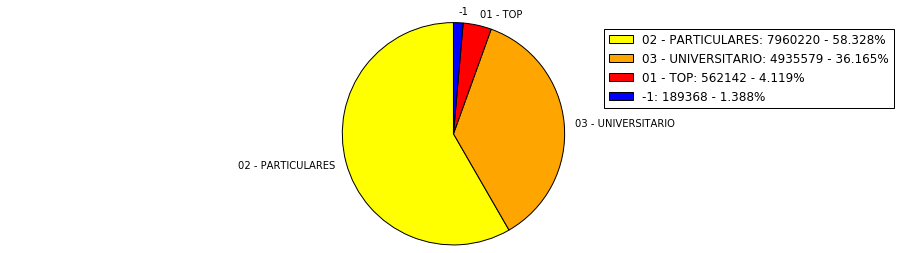

In [276]:
plt.figure(figsize=(16, 4))
plt.pie(segmento.values, labels=segmento.index, colors=['yellow', 'orange', 'red', 'blue'], startangle=90)
plt.legend(loc='best', labels=['%s: %d - %1.3f%%' % (lab, segmento.values[i], (segmento.values[i]/sum(segmento.values))*100) for i, lab in enumerate(segmento.index)])
plt.axis('equal');

## TARGETS

In [277]:
list_targets = [i for i in list(df.columns) if "ind_" and "_ult1" in i ]
print("Cantidad de targets", len(list_targets))
print()
print(list_targets)

Cantidad de targets 24

['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


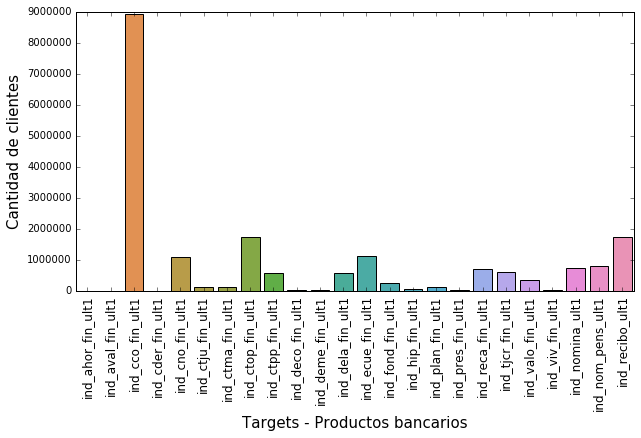

In [278]:
targets_count = df.iloc[:,24:].sum(axis=0)
plt.figure(figsize=(10, 5))
sns.barplot(targets_count.index, targets_count.values)
plt.xticks(rotation="vertical", fontsize=12);
plt.ylabel('Cantidad de clientes', fontsize=15)
plt.xlabel('Targets - Productos bancarios', fontsize=15)

In [280]:
targets = df.iloc[:, 24:]

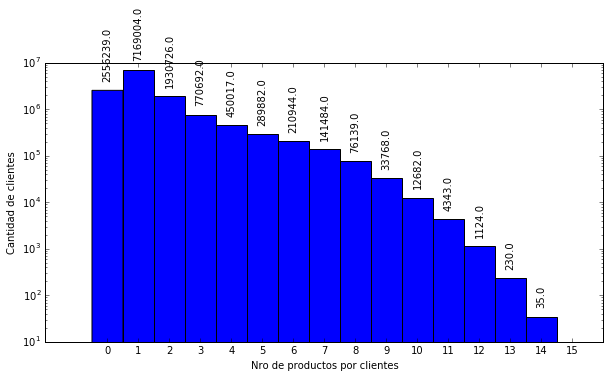

In [349]:
plt.figure(figsize=(10, 5))
counts = plt.hist(targets.sum(axis=1), bins=15, align='left', log=True)
plt.ylabel('Cantidad de clientes')
plt.xlabel('Nro de productos por clientes')
plt.xticks(range(16));

for i in range(len(counts[0])):
    plt.text(i, counts[0][i]*1.5, str(counts[0][i]), ha='center', rotation='vertical',  va='bottom')

In [355]:
np.unique(np.sum(targets, axis=1), return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.]),
 array([2556239, 7169004, 1930726,  770692,  450017,  289882,  210944,
         141484,   76139,   33768,   12682,    4343,    1124,     230,
             26,       9]))